In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, x_test.shape)
print(y_train[:10])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 28, 28) (10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


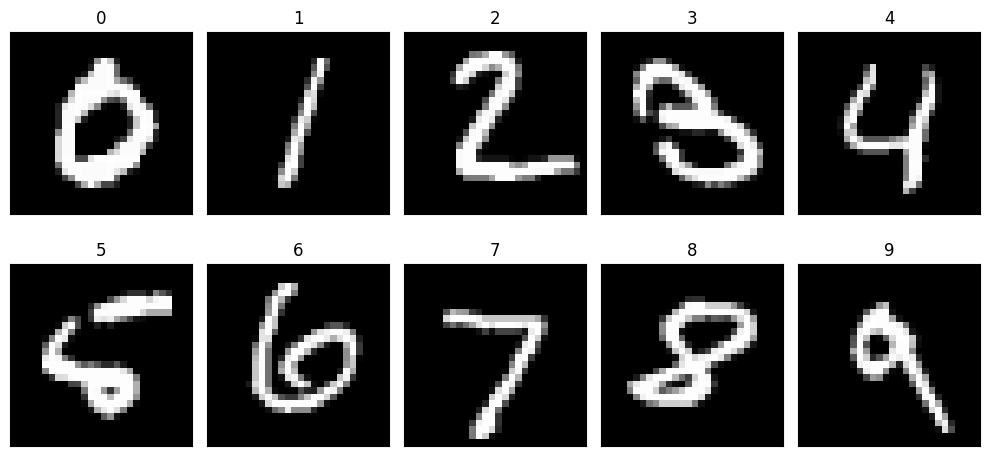

In [3]:
fig, axes = plt.subplots(2,5, figsize=(10,5))

for idx , ax in enumerate(axes.flatten()):
    for i in range(len(x_test)):
        if y_test[i] ==idx:
            ax.imshow(x_test[i] , cmap = 'gray')
            ax.set_title(str(idx))
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break

plt.tight_layout()
plt.show()

In [4]:
x_train_vec = x_train.reshape(x_train.shape[0], -1)
x_test_vec = x_test.reshape(x_test.shape[0], -1)

print("The dim of x_train:", x_train_vec.shape)
print("The dim of x_test :", x_test_vec.shape)

x_train_vec = x_train_vec / 255.0
x_test_vec = x_test_vec / 255.0



The dim of x_train: (60000, 784)
The dim of x_test : (10000, 784)


In [5]:
print("Before to categorical:", y_train[:10])

y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

print("after to_categorical (첫번쨰 샘플):")
print(y_train_cat[0])

Before to categorical: [5 0 4 1 9 2 1 3 1 4]
after to_categorical (첫번쨰 샘플):
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
num_classes = 10

my_model = Sequential()
my_model.add(Dense(units=20, input_shape=(x_train_vec.shape[1],), activation = 'relu'))
my_model.add(Dense(units=num_classes, activation = 'softmax'))

my_model.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [11]:
num_classes = 10

my_model2 = Sequential()
my_model2.add(Dense(512, input_shape=(x_train_vec.shape[1],)))
my_model2.add(Activation('relu'))
my_model2.add(Dropout(0.2))

my_model2.add(Dense(512))
my_model2.add(Activation('relu'))
my_model2.add(Dropout(0.2))

my_model2.add(Dense(num_classes))
my_model2.add(Activation('softmax'))

my_model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
my_model2.compile(optimizer = 'adam', loss='categorical_crossentropy',
                  metrics = ['accuracy'])

history = my_model2.fit(x_train_vec, y_train_cat,
                        epochs = 10,
                        batch_size= 32,
                        verbose =1)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9331 - loss: 0.2177 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9677 - loss: 0.1041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9749 - loss: 0.0801
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9793 - loss: 0.0662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9820 - loss: 0.0575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9843 - loss: 0.0494
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9853 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9868 - loss: 0.0420
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9875 - loss: 0.0393
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9881 - loss: 0.0395


In [15]:
output = my_model2.predict(x_test_vec)
print(output.shape)
print(output[0, :])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
(10000, 10)
[1.9634815e-13 5.0366236e-07 5.4751520e-10 9.0782741e-08 1.4861816e-09
 1.2983503e-11 2.5284616e-16 9.9999928e-01 3.9626197e-10 6.4922318e-08]


In [16]:
pred_label_0 = np.argmax(output[0])
print("첫번째 테스트 이미지 예측 label:", pred_label_0)

y_pred = np.argmax(output, axis = 1)
print(y_pred[:10])

첫번째 테스트 이미지 예측 label: 7
[7 2 1 0 4 1 4 9 5 9]


In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [17]:
#HW7 과제
output = my_model2.predict(x_test_vec)
y_pred = np.argmax(output, axis=1)

y_true = np.argmax(y_test_cat, axis=1)

accuracy = np.mean(y_pred == y_true)
print("Test accuracy:", accuracy)

print("첫 번째 테스트 이미지 예측 label:", y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test accuracy: 0.9824
첫 번째 테스트 이미지 예측 label: 7
